In [26]:
import torch
import trimesh
from trimesh.util import triangle_strips_to_faces

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

torch.set_printoptions( sci_mode=False)

In [2]:
def create_strips(n, m):
    res = []
    for i in range(n-1):
        strip = []
        for j in range(m):            
            #strip.append(j+(i+1)*m)
            strip.append(j+i*m)
            strip.append(j+(i+1)*m)
        res.append(strip)
    return res

def make_faces(n, m):
    strips = create_strips(n, m)    
    return triangle_strips_to_faces(strips)    

In [3]:
n = 8
x, y = torch.meshgrid(torch.arange(8), torch.arange(8))
x, y

(tensor([[0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1],
         [2, 2, 2, 2, 2, 2, 2, 2],
         [3, 3, 3, 3, 3, 3, 3, 3],
         [4, 4, 4, 4, 4, 4, 4, 4],
         [5, 5, 5, 5, 5, 5, 5, 5],
         [6, 6, 6, 6, 6, 6, 6, 6],
         [7, 7, 7, 7, 7, 7, 7, 7]]),
 tensor([[0, 1, 2, 3, 4, 5, 6, 7],
         [0, 1, 2, 3, 4, 5, 6, 7],
         [0, 1, 2, 3, 4, 5, 6, 7],
         [0, 1, 2, 3, 4, 5, 6, 7],
         [0, 1, 2, 3, 4, 5, 6, 7],
         [0, 1, 2, 3, 4, 5, 6, 7],
         [0, 1, 2, 3, 4, 5, 6, 7],
         [0, 1, 2, 3, 4, 5, 6, 7]]))

In [4]:
xy = torch.outer(torch.arange(1, n+1), torch.arange(1,  n+1))
print(xy.shape)
xy

torch.Size([8, 8])


tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 2,  4,  6,  8, 10, 12, 14, 16],
        [ 3,  6,  9, 12, 15, 18, 21, 24],
        [ 4,  8, 12, 16, 20, 24, 28, 32],
        [ 5, 10, 15, 20, 25, 30, 35, 40],
        [ 6, 12, 18, 24, 30, 36, 42, 48],
        [ 7, 14, 21, 28, 35, 42, 49, 56],
        [ 8, 16, 24, 32, 40, 48, 56, 64]])

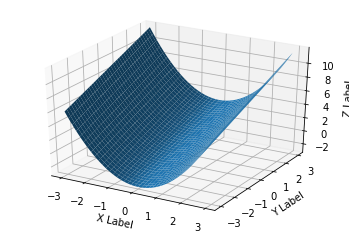

In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

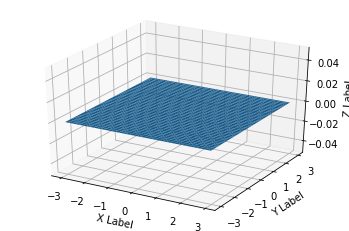

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.zeros_like(X)
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

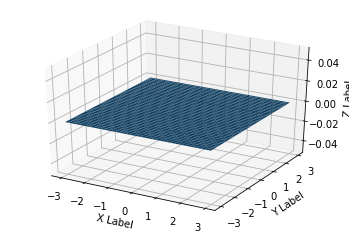

In [7]:
xs = ys = torch.arange(-3.0, 3.0, 0.05)
x, y = torch.meshgrid(xs, ys)
z = torch.zeros_like(x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x.numpy(), y.numpy(), z.numpy())

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [8]:
vertices = torch.stack((x, y, z), dim=-1).reshape(-1, 3)
vertices.shape

torch.Size([14400, 3])

In [9]:
faces = make_faces(120, 120)
faces.shape

(28322, 3)

In [10]:
mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
mesh.show();

In [ ]:
mesh.export('./plane120x120_2.stl');

In [ ]:
mesh.vertex_normals

In [ ]:
vn(vertices[None])

In [5]:
import torch

t = torch.tensor([[[1, 2],
                    [3, 4]],
                   [[5, 6],
                    [7, 8]]])
t.ravel

AttributeError: 'Tensor' object has no attribute 'ravel'

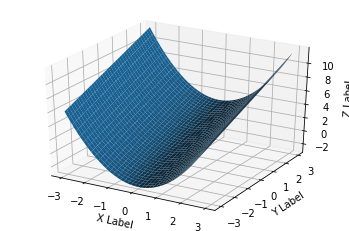

In [12]:
def fun(x, y):
    return x**2 + y


zs = np.array(fun(np.ravel(x.numpy()), np.ravel(y.numpy())))
z = torch.tensor(zs.reshape(X.shape))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x.numpy(), y.numpy(), z.numpy())

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [13]:
vertices = torch.stack((x, y, z), dim=-1).reshape(-1, 3)
print(vertices.shape)
faces = make_faces(120, 120)
print(faces.shape)
mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
#mesh.show();

mesh.export('./curved_plane120x120_0.stl');

torch.Size([14400, 3])
(28322, 3)


In [22]:
mvn = torch.tensor(mesh.vertex_normals.copy()).float()
mvn.shape

torch.Size([14400, 3])

In [27]:
from argparse import Namespace
from src.vertex_normals import VertexNormals


opt = Namespace()
opt.data_dir = './data/'
opt.data_patch_size = 120
print(opt)
vn = VertexNormals(opt)
print(vn)

calc_mvn = vn(vertices[None])
calc_mvn

Namespace(data_dir='./data/', data_patch_size=120)
VertexNormals: size: 120 path: ./data/trimap_120.pth


tensor([[[ 0.9729, -0.1635,  0.1635],
         [ 0.9729, -0.1635,  0.1635],
         [ 0.9729, -0.1635,  0.1635],
         ...,
         [-0.9720, -0.1662,  0.1662],
         [-0.9720, -0.1662,  0.1662],
         [-0.9720, -0.1662,  0.1662]]])

In [28]:
mvn[None]

tensor([[[     0.0000,     -0.7071,      0.7071],
         [    -0.0000,     -0.7071,      0.7071],
         [    -0.0000,     -0.7071,      0.7071],
         ...,
         [     0.7491,     -0.4684,      0.4684],
         [     0.7491,     -0.4684,      0.4684],
         [     0.7491,     -0.4684,      0.4684]]])

In [38]:
calc_fn =  vn.get_face_normals(vertices[None])
print(calc_fn.shape)

m_fn = torch.tensor(mesh.face_normals.copy()).float()[None]
print(m_fn.shape)
m_fn

torch.allclose(calc_fn, m_fn)

torch.Size([1, 28322, 3])
torch.Size([1, 28322, 3])


True

In [39]:
calc_vn =  vn(vertices[None])
print(calc_vn.shape)

m_vn = torch.tensor(mesh.vertex_normals.copy()).float()[None]
print(m_vn.shape)

torch.allclose(calc_vn, m_vn)

torch.Size([1, 14400, 3])
torch.Size([1, 14400, 3])


False

In [40]:
calc_vn

tensor([[[ 0.9729, -0.1635,  0.1635],
         [ 0.9729, -0.1635,  0.1635],
         [ 0.9729, -0.1635,  0.1635],
         ...,
         [-0.9720, -0.1662,  0.1662],
         [-0.9720, -0.1662,  0.1662],
         [-0.9720, -0.1662,  0.1662]]])

In [41]:
m_vn

tensor([[[     0.0000,     -0.7071,      0.7071],
         [    -0.0000,     -0.7071,      0.7071],
         [    -0.0000,     -0.7071,      0.7071],
         ...,
         [     0.7491,     -0.4684,      0.4684],
         [     0.7491,     -0.4684,      0.4684],
         [     0.7491,     -0.4684,      0.4684]]])